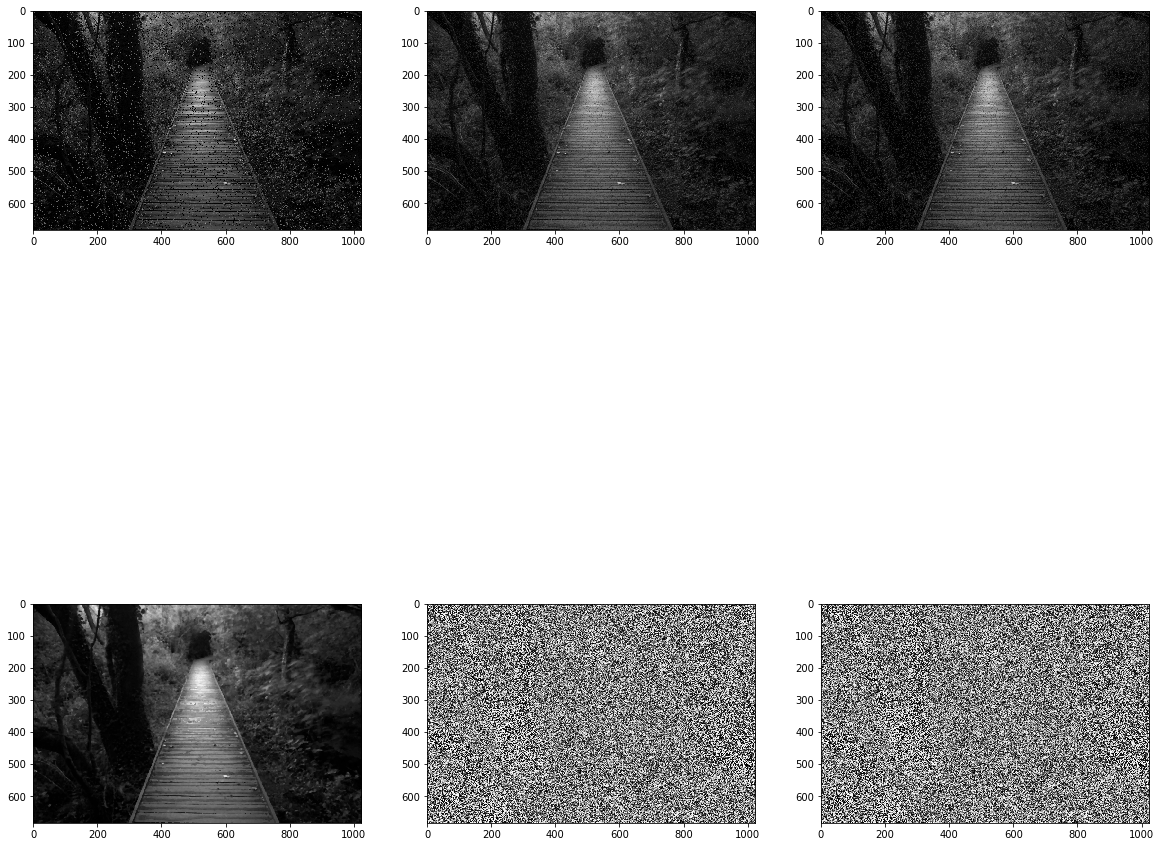

In [74]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random

from skimage import color
from skimage.morphology import disk
from skimage.filters.rank import median
import cv2
dark = img.imread('dark.jpeg')
grey =color.rgb2gray(dark)
fig = plt.figure(figsize=(20,20))

def sp_noise(image,prob):

# Add salt and pepper noise to image
# prob: Probability of the noise

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 100
            else:
                output[i][j] = image[i][j]
    return output

imagee = cv2.imread('dark.jpeg',0) # Only for grayscale image

noise_img = sp_noise(imagee,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)

k1 = np.array([[1 / 16,2 / 16,1 / 16],[2 / 16,4 / 16,2 / 16],[1 / 16,2 / 16,1 / 16]])
flt1 = ndimage.convolve(noise_img, k1, mode='nearest', cval=0.0)

k2 = np.array([[0 / 5, 1 / 5, 0 / 5], [1 / 5, 1 / 5, 1 / 5],[0 / 5, 1 / 5, 0 / 5]])
flt2 = ndimage.convolve(noise_img, k2, mode='nearest', cval=0.0)

k3 = np.array([[-1, -2, -1], [-2, 12, -2],[-1, -2, -1]])
flt3 = ndimage.convolve(noise_img, k3, mode='nearest', cval=0.0)

flt4 = median(noise_img, disk(3))

k5 = np.array([[-1, -2, -1], [0, 0, 0],[1, 2, 1]])
flt5 = ndimage.convolve(noise_img, k3, mode='nearest', cval=0.0)

plt.subplot(231)
plt.imshow(noise_img, cmap='gray')

plt.subplot(232)
plt.imshow(flt1,  cmap='gray')

plt.subplot(233)
plt.imshow(flt2,  cmap='gray')

plt.subplot(234)
plt.imshow(flt4,  cmap='gray')

plt.subplot(235)
plt.imshow(flt3,  cmap='gray')

plt.subplot(236)
plt.imshow(flt5,  cmap='gray')